Mateo Andrey Soto Londoño

# Selección de Factores con Random Forest

In [17]:
%matplotlib inline
#Importamos librerías básicas
import os
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

input_path = os.path.join('..', 'input')
output_path = os.path.join('..', 'output')

In [6]:
#Cargamos los datos
data = pd.read_csv(os.path.join(output_path, 'descriptive_mining', 'final1_description_numeric.csv'))
data.head()

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                           0                      0   
1                                           0                      0   
2                                           0                      0   
3                                           0                      0   
4                                           0                      0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
0                     1                      0  ...                0.0   
1                     0                      0  ...                0.0   
2                     1                      0  ...                0.0   
3                     1                      0  ...                0.0   
4                     0                      0  ...                0.0   

   houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  \
0                0.0           0.698113           0.000000          0.056604   
1                0.0           0.969231           0.538462          0.107692   
2                0.0           1.000000           0.000000          0.000000   
3                0.0           1.000000           0.000000          0.000000   
4                0.0           0.987654           0.679012          0.111111   

   houses_TP14_6_TIP  houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  \
0                0.0                0.0                0.0            3.0000   
1                0.0                0.0                0.0            2.6250   
2                0.0                0.0                0.0            1.7500   
3                0.0                0.0                0.0            1.7500   
4                0.0                0.0                0.0            3.3125   

   causa_retiro  
0             1  
1             0  
2             1  
3             1  
4             1  

[5 rows x 111 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Columns: 111 entries, Desc_Cargo_AUXILIAR ADMINSTRATIVO to causa_retiro
dtypes: float64(60), int64(51)
memory usage: 218.7 KB


In [9]:
# Perfilado de datos
from ydata_profiling import ProfileReport

#este perfilado nos da mucha información mínima de cada una de las variables y saca alertas

profile_data=ProfileReport(data, minimal=True) # minimal=False
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 111/111 [00:00<00:00, 769.15it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

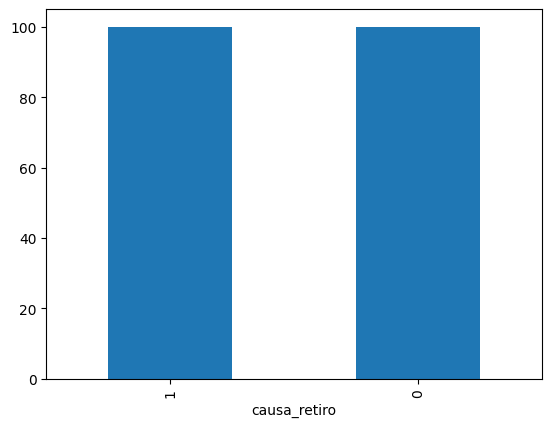

In [16]:
X = data.drop("causa_retiro", axis = 1) # Variables predictoras
Y = data['causa_retiro'] #Variable objetivo
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado = respeta las proporciones en la division. En clasificacion siempre debería ir en Yes. No se puede cambiar el orden
Y_train.value_counts().plot(kind='bar')
plt.show()

In [18]:
model_rf= RandomForestClassifier(n_estimators=200,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train) #70%


#Evaluación
Y_pred = model_rf.predict(X_test) #30%
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56        43
           1       0.53      0.44      0.48        43

    accuracy                           0.52        86
   macro avg       0.52      0.52      0.52        86
weighted avg       0.52      0.52      0.52        86



In [19]:
importance = pd.DataFrame({'Column': X_train.columns, 'Importance': model_rf.feature_importances_})
importance.sort_values('Importance', ascending=False)

Column  Importance
76          permanencia    0.093609
50                anios    0.038484
87   persons_TP34_9_EDA    0.038115
75           PERSONAS_S    0.033785
91   persons_TP32_1_SEX    0.030386
..                  ...         ...
48        NMB_LC_CM_nan    0.000000
63           TP9_3_99_N    0.000000
66           TP14_5_TIP    0.000000
102   houses_TP19_EE_E6    0.000000
108   houses_TP14_4_TIP    0.000000

[110 rows x 2 columns]

In [20]:
# Crear dataframe con importancias
importance = pd.DataFrame({
    'Column': X_train.columns,
    'Importance': model_rf.feature_importances_
})

# Ordenar y quedarte con las 20 primeras
top20 = importance.sort_values('Importance', ascending=False).head(20)

In [21]:
# Se imprimen la importancia de las características
print('Importancia de las características')
for i, j in sorted(zip(X_train.columns, model_rf.feature_importances_)):
    print(i, j)

Importancia de las características
DENSIDAD 0.01410347935214776
Desc_Cargo_AUXILIAR ADMINSTRATIVO 7.449344457687724e-05
Desc_Cargo_AUXILIAR AMBIENTAL 0.0
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES 6.232705953261556e-05
Desc_Cargo_CADENERO I 0.0
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF 0.001605119965018345
Desc_Cargo_CONTROLADOR VIAL 0.0
Desc_Cargo_INGENIERO AUXILIAR 0.0
Desc_Cargo_INSPECTOR SST I 0.0
Desc_Cargo_OFICIAL I 0.006386092450228612
Desc_Cargo_OFICIAL II 0.00020115326177443365
Desc_Cargo_OPERADOR DE RETROEXCAVADORA 0.0
Desc_Cargo_OPERADOR GRUA TELESCOPICA 0.0
Desc_Cargo_PERFORISTA -LANZADOR 0.0
Desc_Cargo_SOLDADOR I 0.0
Desc_Cargo_nan 0.0
NMB_LC_CM_BOSA 0.0004971745243281433
NMB_LC_CM_CAZUCA 0.00038434602347536194
NMB_LC_CM_CENTRO 0.0
NMB_LC_CM_CIUDAD BOLIVAR 0.0011187976725677083
NMB_LC_CM_COMPARTIR 0.0009238334924557145
NMB_LC_CM_Comuna No. 09 0.0
NMB_LC_CM_ENGATIVA 0.0
NMB_LC_CM_KENNEDY 0.0
NMB_LC_CM_LA DESPENSA 0.0
NMB_LC_CM_PUENTE ARANDA 0.004993244477522724
NMB_LC_CM_RAFAEL 

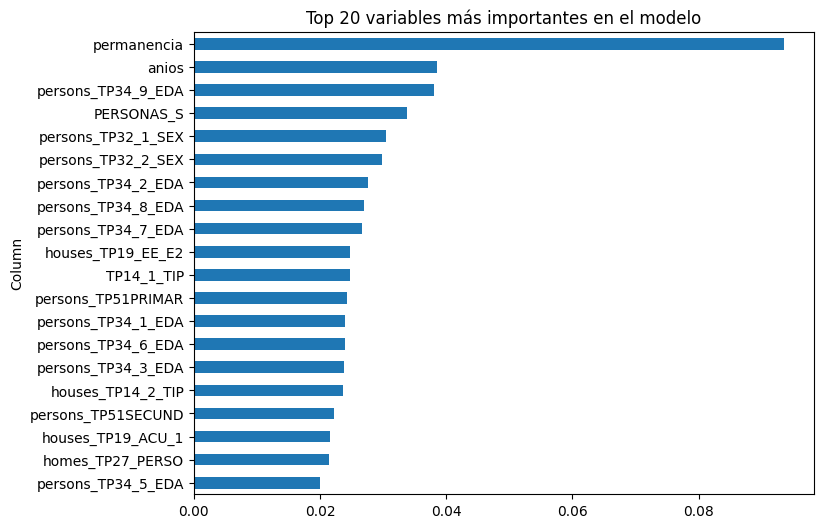

In [22]:
top20.plot(kind='barh', x='Column', y='Importance', legend=False, figsize=(8,6))
plt.title("Top 20 variables más importantes en el modelo")
plt.gca().invert_yaxis()  # para que la más importante quede arriba
plt.savefig(os.path.join('models', "feature_importance_random_forest_plot.png"), dpi=300, bbox_inches="tight")
plt.show()